In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Accuracy: 0.7951219512195122
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

Confusion Matrix:
 [[73 29]
 [13 90]]


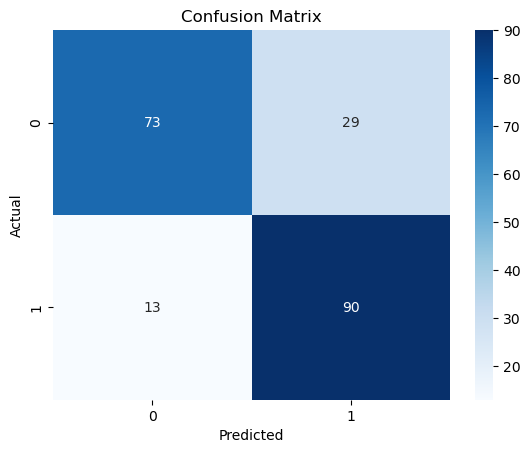

In [11]:
#Heart Disease Diagnostic Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'heart.csv' downloaded from kaggle
df = pd.read_csv('heart.csv')

# Display first few rows
display(df.head())

# Input Schema (Feature Explanation)
input_schema = {
    'age': 'int',
    'sex': 'binary (0 = female, 1 = male)',
    'cp': 'categorical (0-3, chest pain type)',
    'trestbps': 'int, resting blood pressure',
    'chol': 'int, serum cholesterol',
    'fbs': 'binary (0 = false, 1 = true, fasting blood sugar > 120 mg/dl)',
    'restecg': 'categorical (0-2, resting electrocardiographic results)',
    'thalach': 'int, maximum heart rate achieved',
    'exang': 'binary (0 = no, 1 = yes, exercise-induced angina)',
    'oldpeak': 'float, ST depression induced by exercise',
    'slope': 'categorical (0-2, slope of peak exercise ST segment)',
    'ca': 'int, number of major vessels colored by fluoroscopy',
    'thal': 'categorical (0-3, thalassemia type)',
    'target': 'binary (0 = No Heart Disease, 1 = Heart Disease)'
}

# Splitting data
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Output Schema
output_schema = {
    'prediction': 'binary (0 = No Heart Disease, 1 = Heart Disease)'
}

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualization
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Unique Diagnoses:
['All admissions' 'All diseases which can be caused by smoking'
 'All cancers' 'All respiratory diseases' 'All circulatory diseases'
 'All diseases of the digestive system' 'Trachea, Lung, Bronchus'
 'Upper Respiratory Sites' 'Oesophagus' 'Larynx' 'Cervical' 'Bladder'
 'Kidney and Renal Pelvis' 'Stomach' 'Pancreas' 'Unspecified Site'
 'Myeloid Leukaemia' 'Chronic Obstructive Lung Disease'
 'Chronic Airway Obstruction' 'Pneumonia, Influenza' 'Other Heart Disease'
 'Ischaemic Heart Disease' 'Other arterial disease'
 'Cerebrovascular Disease' 'Aortic Aneurysm' 'Atherosclerosis'
 'Stomach / Duodenal Ulcer' 'Crohns Disease'
 'Periodontal Disease / Periodonitis' 'Age Related Cataract 45+'
 'Hip Fracture 55+' 'Spontaneous Abortion']


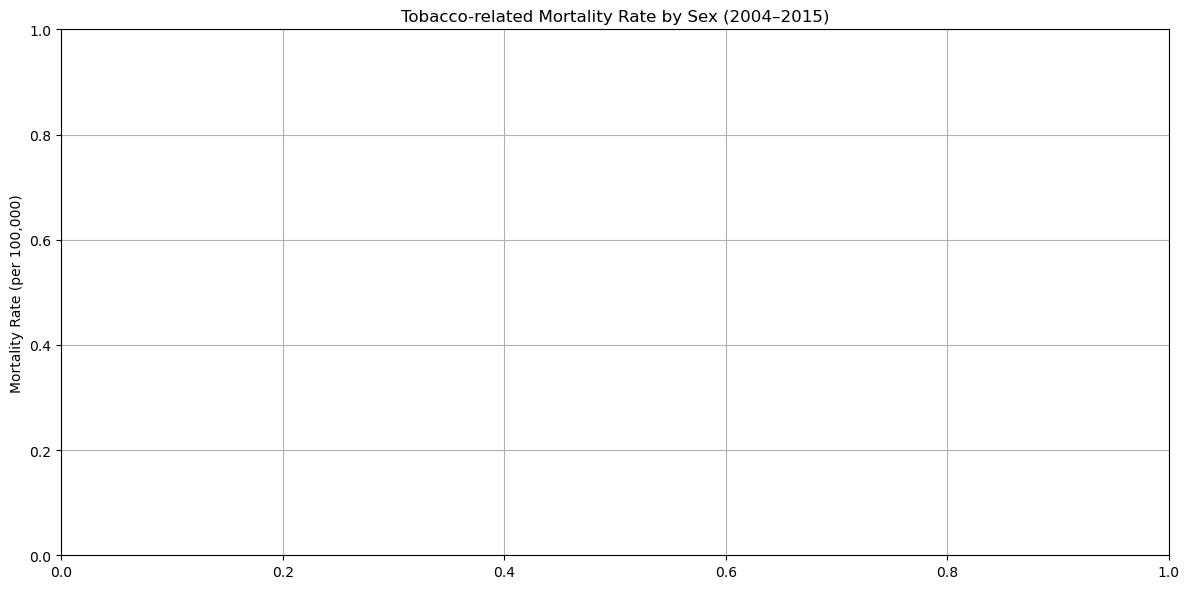


Yearly Mortality Rates by Sex:
Empty DataFrame
Columns: []
Index: []


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("admissions.csv")

# Preview unique diagnoses
print("Unique Diagnoses:")
print(df['ICD10 Diagnosis'].unique())

# Filter for tobacco-related deaths
# You might need to adjust this keyword to match your dataset
tobacco_df = df[df['ICD10 Diagnosis'].str.contains('Tobacco', case=False, na=False)]

# Optional: filter to specific metrics (e.g., 'Rate per 100,000 population')
tobacco_df = tobacco_df[tobacco_df['Metric'].str.contains('Rate', case=False, na=False)]

# Group by Year and Sex (optional), then average the values
grouped = tobacco_df.groupby(['Year', 'Sex'])['Value'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='Year', y='Value', hue='Sex')
plt.title('Tobacco-related Mortality Rate by Sex (2004–2015)')
plt.ylabel('Mortality Rate (per 100,000)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print correlation over time if needed
pivot = grouped.pivot(index='Year', columns='Sex', values='Value')
print("\nYearly Mortality Rates by Sex:")
print(pivot)

           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 no

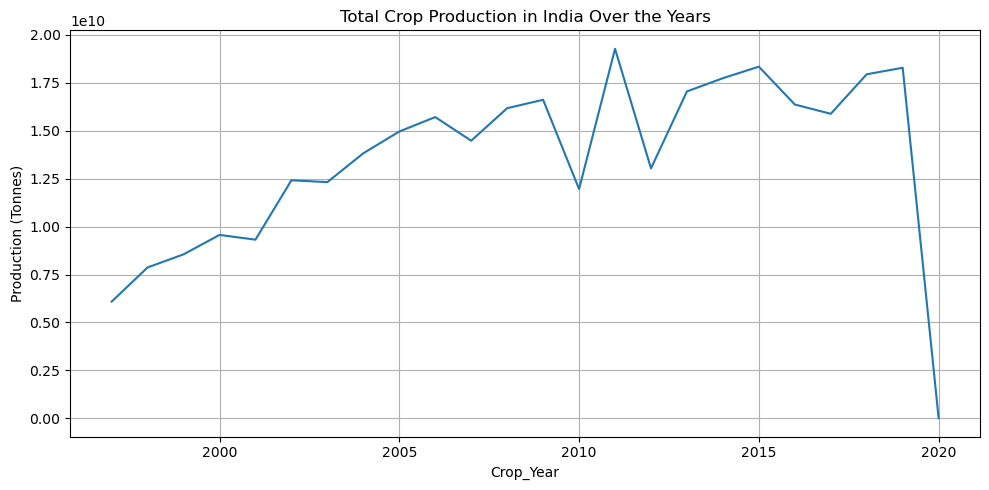

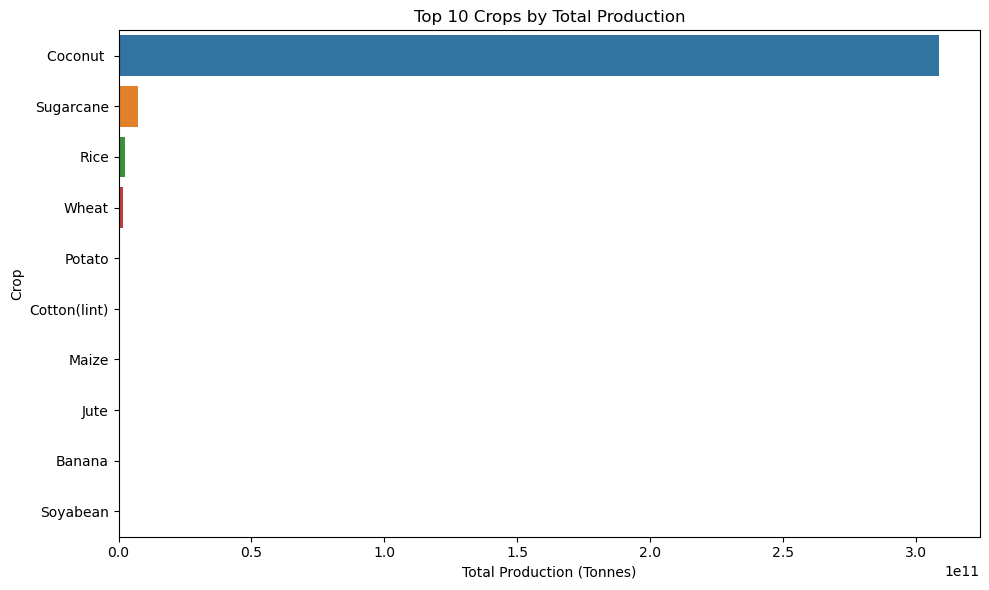

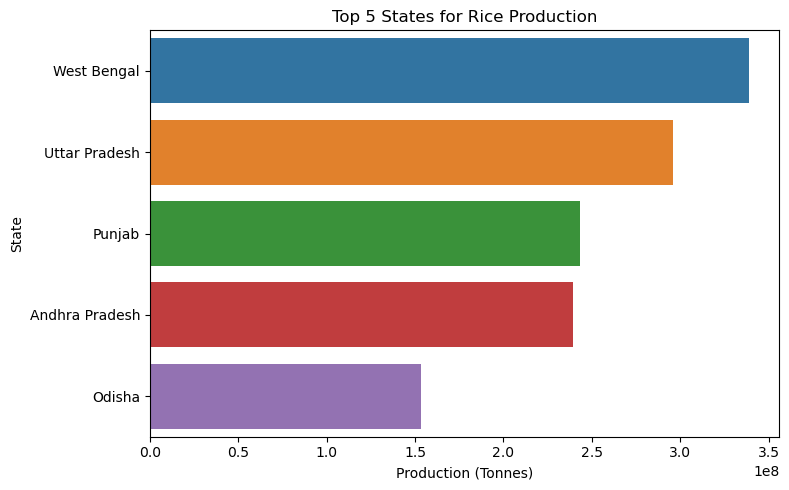

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("crop_yield.csv")

# Preview data
print(df.head())
print(df.info())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Drop rows with missing values (optional)
df.dropna(subset=['Production', 'Area'], inplace=True)

# Convert data types if needed
df['Crop_Year'] = df['Crop_Year'].astype(int)

# Total production by year
yearly_prod = df.groupby('Crop_Year')['Production'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_prod, x='Crop_Year', y='Production')
plt.title('Total Crop Production in India Over the Years')
plt.ylabel('Production (Tonnes)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Top 10 crops by total production
top_crops = df.groupby('Crop')['Production'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_crops.values, y=top_crops.index)
plt.title('Top 10 Crops by Total Production')
plt.xlabel('Total Production (Tonnes)')
plt.tight_layout()
plt.show()

# Top 5 states for a selected crop (e.g., Rice)
selected_crop = 'Rice'
state_crop = df[df['Crop'] == selected_crop].groupby('State')['Production'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=state_crop.values, y=state_crop.index)
plt.title(f'Top 5 States for {selected_crop} Production')
plt.xlabel('Production (Tonnes)')
plt.tight_layout()
plt.show()


In [11]:
print(df.columns)


Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')


In [15]:
def get_health_recommendations(user_profile):
    age = user_profile.get('age')
    sex = user_profile.get('sex')
    bmi = user_profile.get('bmi')
    activity_level = user_profile.get('activity_level')
    smoker = user_profile.get('smoker')
    conditions = user_profile.get('medical_conditions', [])

    recommendations = []

    # BMI Advice
    if bmi < 18.5:
        recommendations.append("Your BMI indicates you're underweight. Consider a nutrient-dense, higher-calorie diet.")
    elif 18.5 <= bmi < 25:
        recommendations.append("Your BMI is in the normal range. Maintain your current lifestyle with balanced nutrition and regular activity.")
    elif 25 <= bmi < 30:
        recommendations.append("You are overweight. Try to increase physical activity and monitor portion sizes.")
    else:
        recommendations.append("You are in the obese range. It's advisable to consult a healthcare provider for a weight loss plan.")

    # Age-Based Screening
    if age >= 45:
        recommendations.append("Consider regular screening for diabetes, cholesterol, and blood pressure.")
    if sex == 'female' and age >= 50:
        recommendations.append("Schedule regular bone density scans to check for osteoporosis.")

    # Activity Level
    if activity_level == 'sedentary':
        recommendations.append("Try to include at least 30 minutes of moderate exercise 5 days a week.")
    elif activity_level == 'active':
        recommendations.append("Great! Keep up your physical activity.")

    # Smoking
    if smoker:
        recommendations.append("Quitting smoking greatly reduces your risk for heart disease and cancer.")

    # Chronic Conditions
    for condition in conditions:
        if condition.lower() == 'hypertension':
            recommendations.append("Reduce sodium intake and monitor your blood pressure regularly.")
        if condition.lower() == 'diabetes':
            recommendations.append("Maintain a low-glycemic diet and check blood sugar levels regularly.")
        if condition.lower() == 'asthma':
            recommendations.append("Avoid known allergens and keep an inhaler accessible.")

    return recommendations


# Example user
user = {
    'age': 52,
    'sex': 'female',
    'bmi': 29.4,
    'activity_level': 'sedentary',
    'smoker': True,
    'medical_conditions': ['Hypertension', 'Asthma']
}

recommendations = get_health_recommendations(user)

print("Personalized Health Recommendations:")
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")


Personalized Health Recommendations:
1. You are overweight. Try to increase physical activity and monitor portion sizes.
2. Consider regular screening for diabetes, cholesterol, and blood pressure.
3. Schedule regular bone density scans to check for osteoporosis.
4. Try to include at least 30 minutes of moderate exercise 5 days a week.
5. Quitting smoking greatly reduces your risk for heart disease and cancer.
6. Reduce sodium intake and monitor your blood pressure regularly.
7. Avoid known allergens and keep an inhaler accessible.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Step 1: Load the CSV safely with auto delimiter detection
try:
    df = pd.read_csv('climate_change.csv', sep=None, engine='python', error_bad_lines=False, encoding='utf-8')
except Exception as e:
    print("Error reading file:", e)
    exit()

# Step 2: Clean column names
df.columns = df.columns.str.strip()
print("\nColumns:", df.columns.tolist())

# Step 3: Preview the data
print("\nPreview of dataset:")
print(df.head())

# Step 4: Check and rename key columns (edit these to match your dataset!)
expected_columns = ['Year', 'Temp_Anomaly', 'CO2_ppm']
if not all(col in df.columns for col in expected_columns):
    # Try to rename columns if they are mislabeled (you can customize these)
    possible_cols = df.columns.str.lower()
    rename_dict = {}
    for col in df.columns:
        lower = col.lower()
        if 'year' in lower:
            rename_dict[col] = 'Year'
        elif 'temp' in lower:
            rename_dict[col] = 'Temp_Anomaly'
        elif 'co2' in lower:
            rename_dict[col] = 'CO2_ppm'
    df.rename(columns=rename_dict, inplace=True)

# Step 5: Final cleanup
df = df[['Year', 'Temp_Anomaly', 'CO2_ppm']]
df = df.dropna()
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna()

# Step 6: Plot Temperature Anomaly
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='Year', y='Temp_Anomaly', label='Temperature Anomaly (°C)', color='tomato')
plt.axhline(0, linestyle='--', color='gray')
plt.title('Global Temperature Anomaly Over Time')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Plot CO2 levels
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='Year', y='CO2_ppm', label='Atmospheric CO₂ (ppm)', color='seagreen')
plt.title('Atmospheric CO₂ Levels Over Time')
plt.ylabel('CO₂ (ppm)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 8: Correlation
correlation = df['Temp_Anomaly'].corr(df['CO2_ppm'])
print(f"\nCorrelation between CO₂ and temperature anomaly: {correlation:.2f}")

# Step 9: Forecast future temperatures
model = LinearRegression()
X = df[['Year']]
y = df['Temp_Anomaly']
model.fit(X, y)

# Predict from 2025 to 2100
future_years = pd.DataFrame({'Year': np.arange(2025, 2101)})
future_temps = model.predict(future_years)

# Plot future prediction
plt.figure(figsize=(12, 5))
sns.lineplot(x=df['Year'], y=df['Temp_Anomaly'], label='Observed')
sns.lineplot(x=future_years['Year'], y=future_temps, label='Projected (Linear)', color='red')
plt.title('Projected Global Temperature Anomaly (2025–2100)')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()